In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')

In [25]:
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [26]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,current_iter,layer_dict.conv0_feature_L2norm,layer_dict.conv1_feature_L2norm,layer_dict.conv2_feature_L2norm,layer_dict.conv3_feature_L2norm,layer_dict.linear_feature_L2norm,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_weight_mean,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
num_step,,,,,,,,,,,,,,,,,,,,,
0,10.5,1216.289036,682.963261,352.127841,179.779788,10.853216,0.001997,129.241503,5.58832,-0.002558,...,209.736543,3.127091,0.770436,-5.561478e-09,0.253085,0.132384,0.001503,0.020915,0.009969,0.675509


In [27]:
specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0_feature_L2norm,layer_dict.conv1_feature_L2norm,layer_dict.conv2_feature_L2norm,layer_dict.conv3_feature_L2norm,layer_dict.linear_feature_L2norm,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
0,0,train,0,1245.017944,711.192078,368.297241,195.944534,13.987854,0.013082,218.354294,...,211.514740,3.152209,0.632717,-2.980232e-09,0.498335,0.275611,0.000000,0.000000,0.000000,0.646444
1,0,train,0,1251.412720,724.907654,371.013428,195.508804,14.901783,0.003604,220.424103,...,211.514740,3.152209,0.648152,-3.725290e-09,0.428868,0.228195,0.000000,0.000000,0.000000,0.658093
2,0,train,0,1244.919800,711.261292,368.286438,196.217834,14.236434,0.015091,211.416351,...,211.518143,3.152269,0.630929,-2.980232e-09,0.509465,0.283205,0.000000,0.000000,0.000000,0.643967
3,0,train,0,1251.332520,724.916565,371.011505,195.761826,15.115088,0.003578,210.138489,...,211.518143,3.152269,0.647576,-5.587935e-09,0.445763,0.237402,0.000000,0.000000,0.000000,0.657250
4,1,train,0,1233.960449,712.777527,364.350311,192.065948,13.077419,-0.008035,233.173157,...,211.454590,3.151631,0.658495,-8.940697e-09,0.333047,0.155723,0.000200,0.005000,0.002236,0.659771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,20,train,0,1199.768677,660.479370,340.543213,170.274506,8.710216,0.014460,78.065163,...,208.076218,3.103402,0.874340,-7.450581e-09,0.165574,0.094662,0.002586,0.027225,0.013777,0.702334
84,21,train,0,1191.774780,648.685547,335.876617,168.703506,8.275422,0.001515,60.663082,...,207.914780,3.101008,0.878502,-5.960465e-09,0.170465,0.098927,0.002667,0.027254,0.013941,0.713304
85,21,train,0,1220.326660,670.695374,345.385834,172.325134,10.081772,-0.007906,81.706009,...,207.914780,3.101008,0.886067,-5.215406e-09,0.165814,0.092491,0.002667,0.027254,0.013941,0.702287
86,21,train,0,1191.505127,648.508057,335.826385,168.975693,8.350355,0.001182,61.465111,...,207.918671,3.101080,0.877980,-5.215406e-09,0.176878,0.101836,0.002667,0.027254,0.013941,0.713106


In [28]:
gr = specific_column_values.groupby('current_iter').mean()

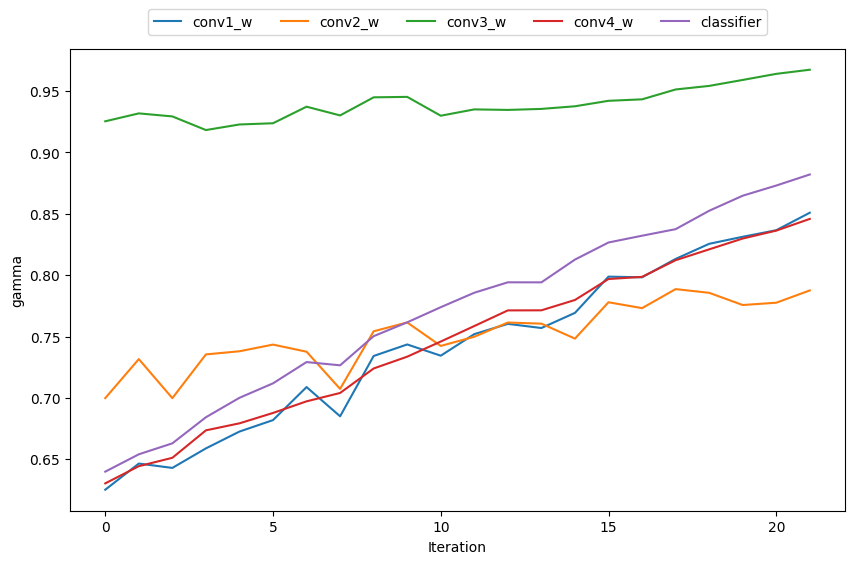

In [29]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('gamma')  


#plt.ylim(0, 100)


plt.show()  # 그래프 보여주기

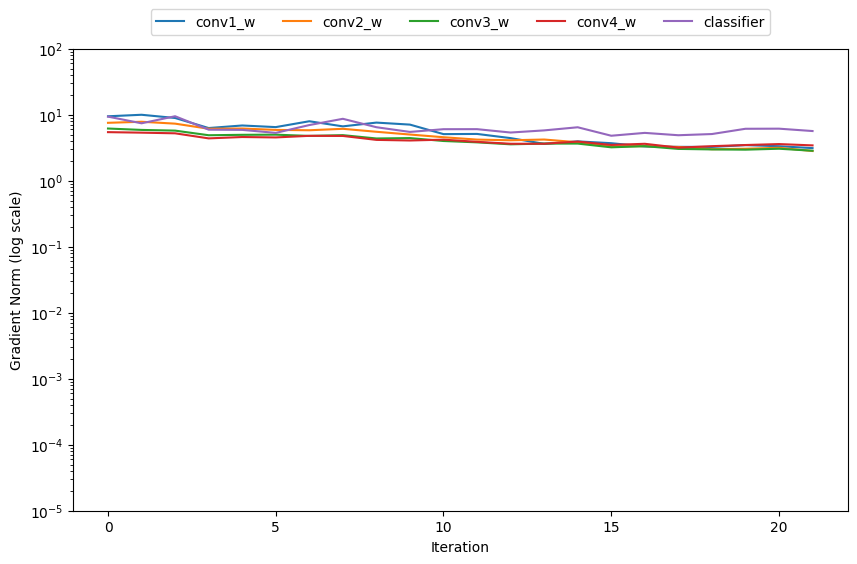

In [30]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm (log scale)')  

plt.yscale('log')  # Y 축을 로그 스케일로 변경
plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

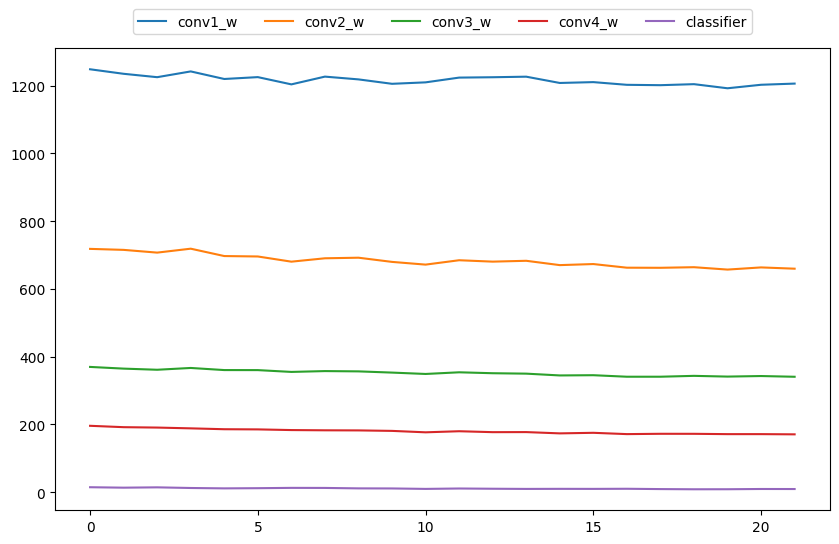

In [31]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0_feature_L2norm', 
                    'layer_dict.conv1_feature_L2norm', 
                    'layer_dict.conv2_feature_L2norm',
                    'layer_dict.conv3_feature_L2norm',
                    'layer_dict.linear_feature_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

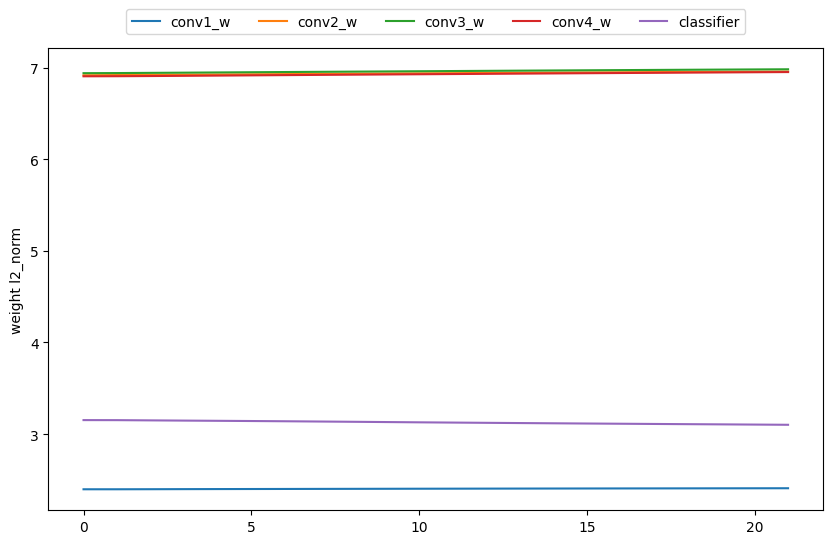

In [32]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기